In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test.head()
train.shape

(333, 15)

In [3]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
train.apply(lambda x: sum(x.isnull()))

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


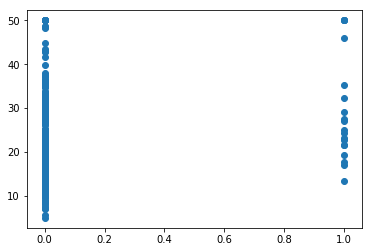

In [4]:
plt.scatter(train.chas,train.medv)

In [5]:
# Tukey Method 
# For each feature find the data points with extreme high or low values
for feature in train.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(train[feature], q=25)
 
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(train[feature], q=75)
 
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
 
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(train[~((train[feature] >= Q1 - step) & (train[feature] <= Q3 + step))])
 
# OPTIONAL: Select the indices for data points you wish to remove
outliers = [0,1,2,3,4,5,6,7,8,9,10,11,12]
# Remove the outliers, if any were specified
good_data = train.drop(train.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'ID':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


Data points considered outliers for the feature 'crim':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
242,368,13.52220,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
245,372,9.23230,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
247,374,11.10810,0.0,18.1,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
248,375,18.49820,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
249,377,15.28800,0.0,18.1,0,0.671,6.649,93.3,1.3449,24,666,20.2,363.02,23.24,13.9
250,378,9.82349,0.0,18.1,0,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24,13.3
251,383,9.18702,0.0,18.1,0,0.700,5.536,100.0,1.5804,24,666,20.2,396.90,23.60,11.3
253,385,20.08490,0.0,18.1,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
254,387,24.39380,0.0,18.1,0,0.700,4.652,100.0,1.4672,24,666,20.2,396.90,28.28,10.5
255,388,22.59710,0.0,18.1,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4


Data points considered outliers for the feature 'zn':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
22,40,0.02763,75.0,2.95,0,0.4280,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
23,41,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
34,55,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
35,56,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
36,57,0.02055,85.0,0.74,0,0.4100,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
37,58,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
43,66,0.03584,80.0,3.37,0,0.3980,6.290,17.8,6.6115,4,337,16.1,396.90,4.67,23.5
44,67,0.04379,80.0,3.37,0,0.3980,5.787,31.1,6.6115,4,337,16.1,396.90,10.24,19.4
131,188,0.07875,45.0,3.44,0,0.4370,6.782,41.1,3.7886,5,398,15.2,393.87,6.68,32.0
132,190,0.08370,45.0,3.44,0,0.4370,7.185,38.9,4.5667,5,398,15.2,396.90,5.39,34.9


Data points considered outliers for the feature 'indus':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


Data points considered outliers for the feature 'chas':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,143,3.32105,0.0,19.58,1,0.8710,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
104,155,1.41385,0.0,19.58,1,0.8710,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
108,161,1.27346,0.0,19.58,1,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
110,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
145,209,0.13587,0.0,10.59,1,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
146,212,0.37578,0.0,10.59,1,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3
149,217,0.04560,0.0,13.89,1,0.5500,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,23.3
150,222,0.40771,0.0,6.20,1,0.5070,6.164,91.3,3.0480,8,307,17.4,395.24,21.46,21.7
151,223,0.62356,0.0,6.20,1,0.5070,6.879,77.7,3.2721,8,307,17.4,390.39,9.93,27.5
161,235,0.44791,0.0,6.20,1,0.5070,6.726,66.5,3.6519,8,307,17.4,360.20,8.05,29.0


Data points considered outliers for the feature 'nox':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


Data points considered outliers for the feature 'rm':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
110,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
113,167,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
126,181,0.06588,0.0,2.46,0,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
130,187,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
141,204,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
142,205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
153,225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
154,226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
155,227,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
159,233,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7


Data points considered outliers for the feature 'age':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


Data points considered outliers for the feature 'dis':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
233,353,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6


Data points considered outliers for the feature 'rad':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


Data points considered outliers for the feature 'tax':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


Data points considered outliers for the feature 'ptratio':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
138,198,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3
174,261,0.54011,20.0,3.97,0,0.647,7.203,81.8,2.1121,5,264,13.0,392.80,9.59,33.8
175,262,0.53412,20.0,3.97,0,0.647,7.520,89.4,2.1398,5,264,13.0,388.37,7.26,43.1
176,263,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8
177,264,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264,13.0,393.42,11.25,31.0
178,265,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,5,264,13.0,387.89,8.10,36.5
179,266,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5,264,13.0,392.40,10.45,22.8
180,267,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264,13.0,384.07,14.79,30.7
181,269,0.54050,20.0,3.97,0,0.575,7.470,52.6,2.8720,5,264,13.0,390.30,3.16,43.5


Data points considered outliers for the feature 'black':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
12,19,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
17,28,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8
20,35,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,21.0,248.31,20.34,13.5
69,103,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
79,119,0.13058,0.0,10.01,0,0.547,5.872,73.1,2.4775,6,432,17.8,338.63,15.37,20.4
91,135,0.97617,0.0,21.89,0,0.624,5.757,98.4,2.3460,4,437,21.2,262.76,17.31,15.6
98,146,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8
103,154,2.14918,0.0,19.58,0,0.871,5.709,98.5,1.6232,5,403,14.7,261.95,15.79,19.4
104,155,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
105,157,2.44668,0.0,19.58,0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14,13.1


Data points considered outliers for the feature 'lstat':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
96,142,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41,14.4
247,374,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
248,375,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
253,385,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
255,388,22.59710,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4
261,399,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
268,415,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0


Data points considered outliers for the feature 'medv':


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
109,162,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
110,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
113,167,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
125,180,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2
126,181,0.06588,0.0,2.46,0,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
128,183,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82,37.9
130,187,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
133,191,0.09068,45.0,3.44,0,0.4370,6.951,21.5,6.4798,5,398,15.2,377.68,5.10,37.0
141,204,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
142,205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0


In [6]:
print(train.shape)
print(good_data.shape)

(333, 15)
(320, 15)


In [89]:
X_main = good_data.drop(['medv','ID'],axis = 1)
y_main = good_data['medv']

In [90]:
#Splitting into train and val set
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_main,y_main,test_size = 1/3,random_state = 0)

In [91]:
y_train.head()

260    11.7
142    37.6
132    24.4
184    27.1
190    28.4
Name: medv, dtype: float64

In [92]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)

In [11]:
#Fitting Linear Regression 
from sklearn.linear_model import LinearRegression
regressor_Linear = LinearRegression().fit(X_train,y_train)
ypred_linear = regressor_Linear.predict(X_val)

In [12]:
print(regressor_Linear.intercept_)
print(regressor_Linear.coef_)

23.269014084507052
[-0.42216227  1.25369856  0.32526179  0.45492121 -1.43830778  3.01620335
 -0.1159805  -3.37404009  3.93955045 -3.33498174 -1.79541624  0.87339612
 -4.07151709]


In [93]:
#R-squared and rmse value for Linear Regression
from sklearn.metrics import mean_squared_error

print('R-squared train score: {:.2f}'.format(regressor_Linear.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(regressor_Linear.score(X_val,y_val)))
print('Root mean squared error(Linear): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_linear))))

R-squared train score: 0.73
R-squared test score: 0.71
Root mean squared error(Linear): 5.06


In [94]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = regressor_Linear, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.6349404376555678

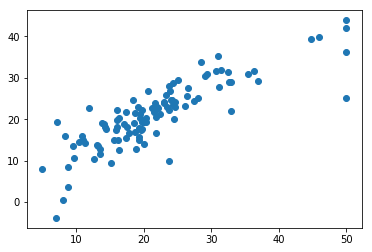

In [15]:
plt.scatter(y_val,ypred_linear )

In [112]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
regression_KNN = KNeighborsRegressor(n_neighbors = 10).fit(X_train,y_train)
ypred_KNN = regression_KNN.predict(X_val)


In [113]:
#R-squared and rmse value for KNN Regression
print('R-squared train score: {:.2f}'.format(regression_KNN.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(regression_KNN.score(X_val,y_val)))
print('Root mean squared error(KNN): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_KNN))))

R-squared train score: 0.74
R-squared test score: 0.67
Root mean squared error(KNN): 5.44


In [114]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = regression_KNN, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.6666220963325322

In [102]:
#Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':range(1,15)}
grid_search = GridSearchCV(estimator = regression_KNN,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.7049982229399132
{'n_neighbors': 2}


In [183]:
#Ridge Regression
from sklearn.linear_model import Ridge
linear_Ridge = Ridge(alpha = 15).fit(X_train,y_train)
ypred_Ridge = linear_Ridge.predict(X_val)

In [184]:
#R-squared and rmse value for Ridge Regression
print('R-squared train score: {:.2f}'.format(linear_Ridge.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(linear_Ridge.score(X_val,y_val)))
print('Root mean squared error(Ridge): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_Ridge))))

R-squared train score: 0.73
R-squared test score: 0.72
Root mean squared error(Ridge): 4.97


In [185]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = linear_Ridge, X = X_train, y = y_train, cv = 10)
r_square.mean()

0.6397742613315744

In [186]:
#Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':range(1,21)}
grid_search = GridSearchCV(estimator = linear_Ridge,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.6404473251392686
{'alpha': 15}


In [187]:
#Lasso Regression
from sklearn.linear_model import Lasso
linear_Lasso = Lasso(alpha = 2).fit(X_train,y_train)
ypred_Lasso = linear_Lasso.predict(X_val)

In [189]:
#R-squared and rmse value for Lasso Regression
print('R-squared train score: {:.2f}'.format(linear_Lasso.score(X_train,y_train)))
print('R-squared test score: {:.2f}'.format(linear_Lasso.score(X_val,y_val)))
print('Root mean squared error(Lasso): {:.2f}'.format(np.sqrt(mean_squared_error(y_val,ypred_Lasso))))

R-squared train score: 0.58
R-squared test score: 0.57
Root mean squared error(Lasso): 6.20


In [190]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
r_square = cross_val_score(estimator = linear_Lasso, X = X_train, y = y_train, cv = 10)
r_square.mean()


0.5424684573689198

In [126]:
#Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':range(1,10)}
grid_search = GridSearchCV(estimator = linear_Lasso,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy )
print(best_parameters)

0.6028709558351752
{'alpha': 1}
